# Python with OpenCV: Morphological Operations on Binary Images

First, let's set up our environment and import the necessary libraries.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
os.chdir("/content/drive/My Drive/CursoVisao/Intro CV with Python/Binary Image")

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# function to show a comparison of two images
def compare_images(title, image, org_image, org_title='Original'):
    plt.figure(figsize=(10, 10))
    plt.subplot(121),plt.imshow(org_image, cmap='gray'),plt.title(org_title)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(image, cmap='gray'),plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Morphological Transformations (Open CV) https://docs.opencv.org/


Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play. We will see them one-by-one with help of following image:

![j.png](attachment:j.png)

## 1. Erosion
The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

![image.png](attachment:image.png)

Here, as an example, I would use a 5x5 kernel with full of ones. Let's see it how it works:


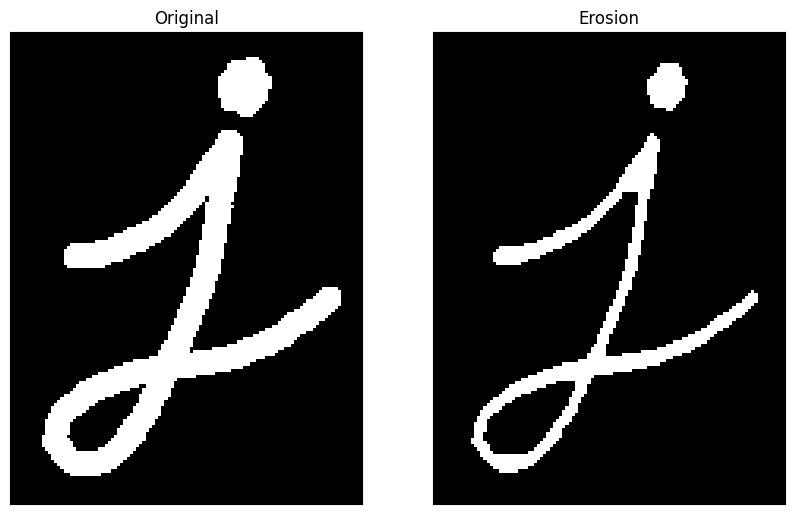

In [17]:
img = cv.imread('j.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((3, 5),np.uint8)
erosion = cv.erode(img, kernel, iterations=1)

compare_images('Erosion', erosion, img)


## 2. Dilation

It is just opposite of erosion. Here, a pixel element is '1' if at least one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

![image.png](attachment:image.png)

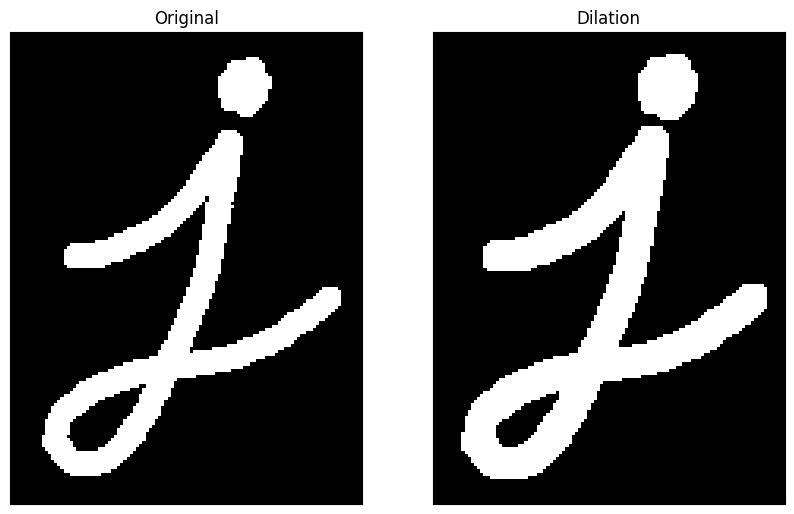

In [23]:
img = cv.imread('j.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((3, 3),np.uint8)
dilation = cv.dilate(img, kernel, iterations=1)

compare_images('Dilation', dilation, img)


## 3. Opening

Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv.morphologyEx()

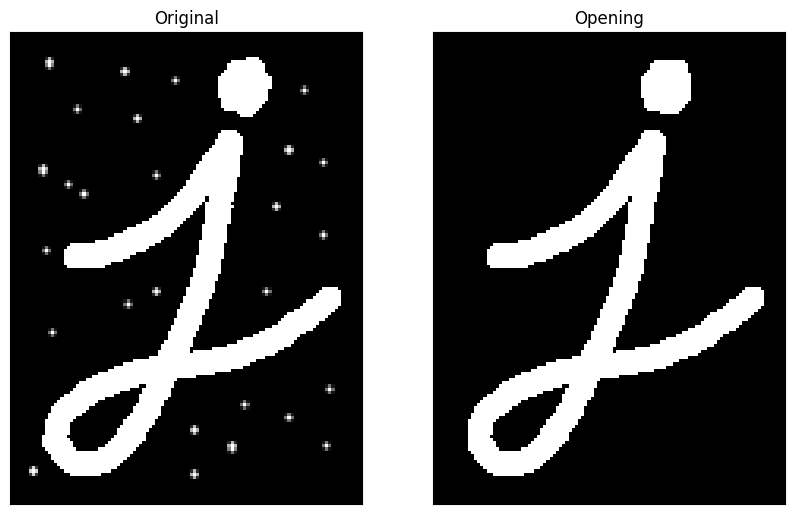

In [24]:
img = cv.imread('j_opening.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5, 5),np.uint8)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

compare_images('Opening', opening, img)



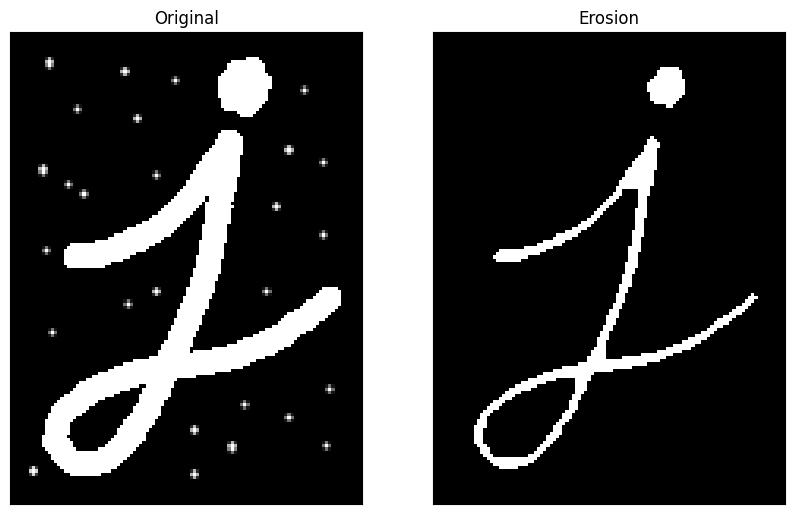

In [25]:
img = cv.imread('j_opening.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5, 5),np.uint8)
erosion = cv.erode(img, kernel, iterations=1)

compare_images('Erosion', erosion, img)

## 4. Closing
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.


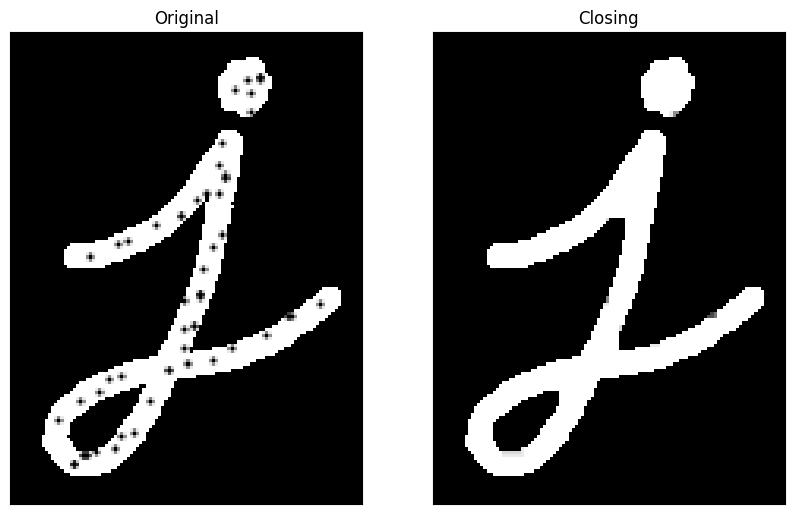

In [26]:
img = cv.imread('j_closing.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5, 5),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

compare_images('Closing', closing, img)


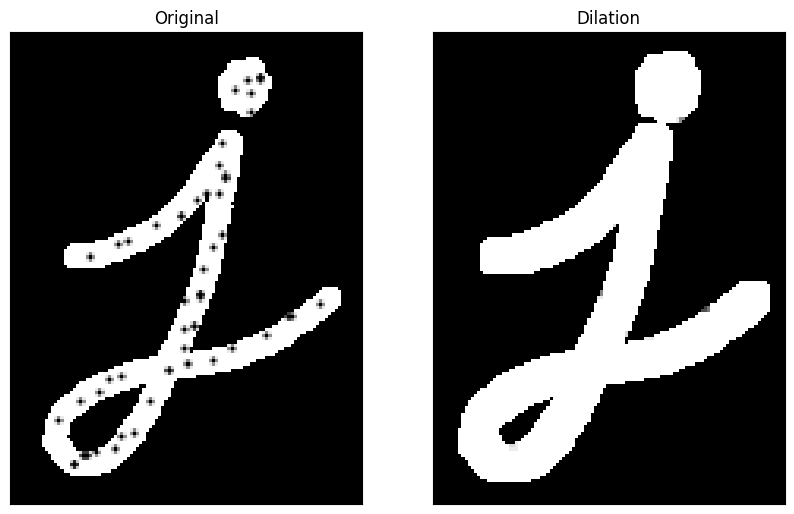

In [28]:
img = cv.imread('j_closing.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5, 5),np.uint8)
dilation = cv.dilate(img, kernel, iterations=1)

compare_images('Dilation', dilation, img)

## 5. Morphological Gradient
It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.


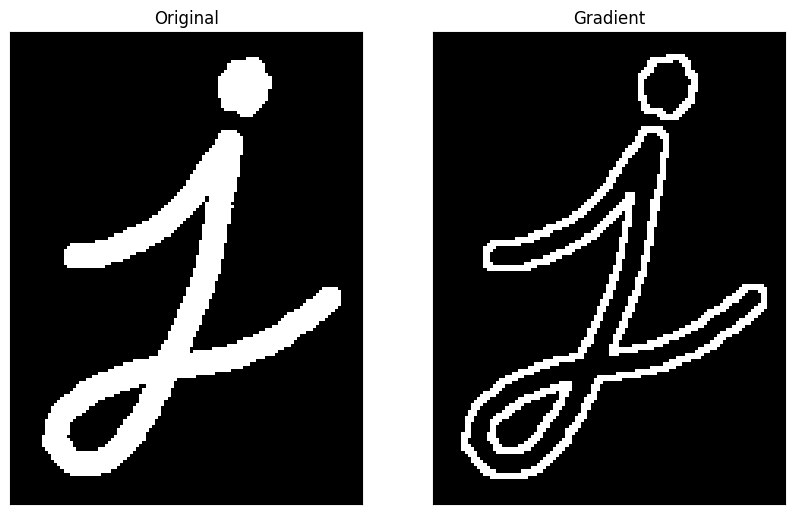

In [29]:
img = cv.imread('j.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((3, 3),np.uint8)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

compare_images('Gradient', gradient, img)

## 6. Skeletonization
Skeletonization reduces objects to their skeletons, preserving the structure of objects while minimizing their size

In [ ]:
def skeletonize(image):
    # Calculate the total number of pixels in the image.
    size = np.size(image)

    # Initialize an empty image to store the skeleton.
    skel = np.zeros(image.shape, np.uint8)

    # Convert the input image to a binary image with values 0 or 255.
    # The threshold is set at 127: pixels above 127 will be set to 255 (white), others to 0 (black).
    ret, image = cv.threshold(image, 127, 255, 0)
    ret, image = cv.threshold(image, 127, 255, 0)

    # Define a cross-shaped structuring element.
    element = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

    done = False

    while not done:
        # Perform erosion.
        eroded = cv.erode(image, element)

        # Perform dilation on the eroded image.
        temp = cv.dilate(eroded, element)

        # Subtract dilated image from the original.
        temp = cv.subtract(image, temp)

        # Update the skeleton.
        skel = cv.bitwise_or(skel, temp)

        # Update image for next iteration.
        image = eroded.copy()

        # Check if image is fully eroded.
        zeros = size - cv.countNonZero(image)
        if zeros == size:
            done = True

    return skel

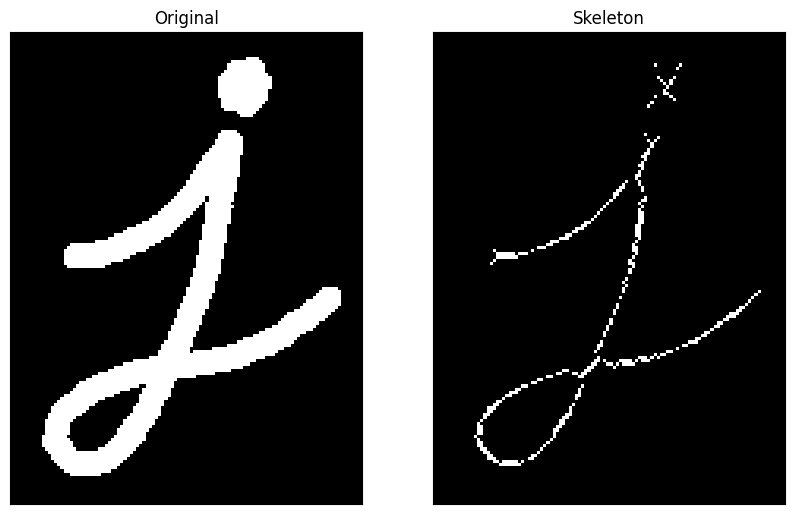

In [ ]:
img = cv.imread('j.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
skeleton = skeletonize(img)

compare_images('Skeleton', skeleton, img)

# Counting coins

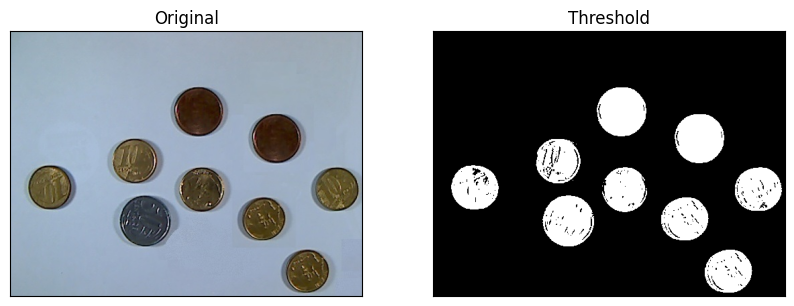

In [ ]:
# Load the image file
coins = cv.imread('coins_Br.jpg')
coinsrgb = cv.cvtColor(coins, cv.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv.cvtColor(coins, cv.COLOR_BGR2GRAY)

# Apply binary thresholding with Otsu's method to binarize the image
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

compare_images('Threshold', thresh, coinsrgb)

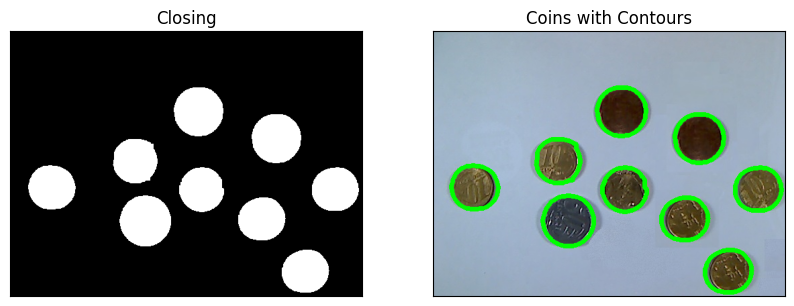

In [ ]:
# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Apply morphological closing to fill small holes in the binary image
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations = 2)

# Find contours in the closed image
cnts, _ = cv.findContours(closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
for i in range(len(cnts)):
    cv.drawContours(coins, cnts, i, (0, 255, 0), 6)

# Convert the image from BGR to RGB for matplotlib
coins_rgb = cv.cvtColor(coins, cv.COLOR_BGR2RGB)


compare_images('Coins with Contours', coins_rgb, closing, 'Closing')

## Segmentation each coin with different Color

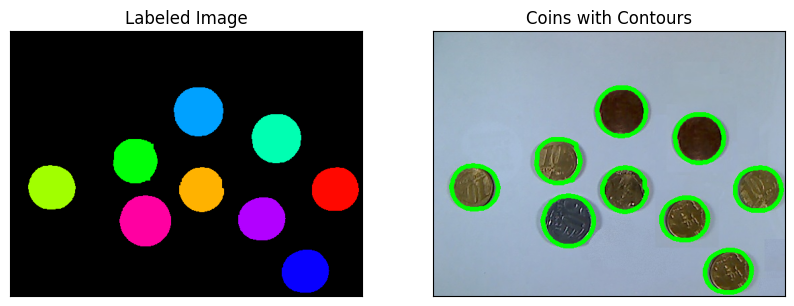

In [ ]:
# Load the image file
coins = cv.imread('coins_Br.jpg')
coinsrgb = cv.cvtColor(coins, cv.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv.cvtColor(coins, cv.COLOR_BGR2GRAY)

# Apply binary thresholding with Otsu's method to binarize the image
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Apply morphological closing to fill small holes in the binary image
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations = 2)

# Marker labelling
# Connected Components determines the connectivity of blob-like regions in a binary image.
ret, markers = cv.connectedComponents(closing)

# Create a color image to visualize each component
label_hue = np.uint8(179 * markers / np.max(markers))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

# Convert from HSV to BGR for OpenCV
labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

# Set the background label to zero
labeled_img[label_hue == 0] = 0

compare_images('Coins with Contours', coins_rgb, labeled_img, 'Labeled Image')

## How it works?

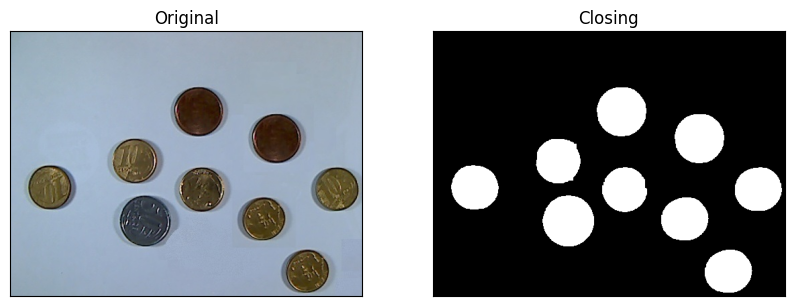

In [ ]:
# Load the image file
coins = cv.imread('coins_Br.jpg')
coinsrgb = cv.cvtColor(coins, cv.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv.cvtColor(coins, cv.COLOR_BGR2GRAY)

# Apply binary thresholding with Otsu's method to binarize the image
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Apply morphological closing to fill small holes in the binary image
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations = 2)

compare_images('Closing', closing, coinsrgb)


nothing new so far.

### cv.connectedComponents(closing)

The command ret, markers = cv.connectedComponents(closing) is used in image processing to label the connected components in a binary image.

__Explanation:__
This function scans a binary image and labels all connected components (regions of adjacent pixels that share the same value). It is useful for identifying and separating different objects in the image.

__Parameters:__
- __closing:__ This is the input binary image where the objects to be labeled are typically white (255) and the background is black (0).

__Returns:__
- __ret:__ This is an integer representing the number of connected components found in the image. This count includes the background as a component, so the number of objects is 'ret - 1' if the background is considered as one component.
- __markers:__ This is an output image (of the same size as the input) where each pixel is labeled with an integer value representing the component to which it belongs. Each connected component gets a unique integer label.

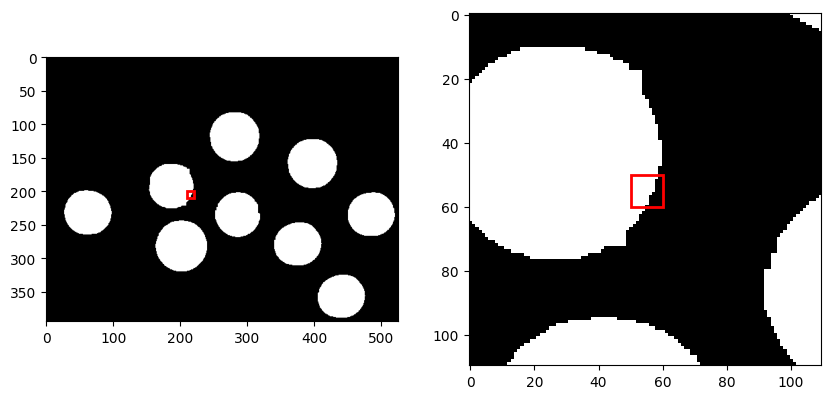

[[3 3 3 3 3 3 3 3 3 0]
 [3 3 3 3 3 3 3 3 3 0]
 [3 3 3 3 3 3 3 3 0 0]
 [3 3 3 3 3 3 3 3 0 0]
 [3 3 3 3 3 3 3 3 0 0]
 [3 3 3 3 3 3 3 3 0 0]
 [3 3 3 3 3 3 3 0 0 0]
 [3 3 3 3 3 3 0 0 0 0]
 [3 3 3 3 3 3 0 0 0 0]
 [3 3 3 3 3 3 0 0 0 0]]


In [ ]:
# Marker labelling
# Connected Components determines the connectivity of blob-like regions in a binary image.
ret, markers = cv.connectedComponents(closing)

# Coordinates for the square
_x = [210, 10]
_y = [200, 10]

plt.figure(figsize=(10, 10))

# Display the original binary image
plt.subplot(121)  # Create a subplot in a 1x2 grid, first position
plt.imshow(closing, cmap='gray')  # Show the binary image in grayscale
plt.axis('on')  # Turn on the axis

# Draw a red square on the original image
rect = plt.Rectangle((_x[0], _y[0]), _x[1], _y[1], linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)  # Add the square to the current plot

# Display a zoomed-in section of the image with padding
plt.subplot(122)  # Create a subplot in a 1x2 grid, second position
pad = 50  # Padding around the zoomed-in section

# Show the zoomed-in section of the binary image
plt.imshow(closing[_y[0]-pad:_y[0]+_y[1]+pad, _x[0]-pad:_x[0]+_x[1]+pad], cmap='gray')

# Draw a red square on the zoomed-in section
rect = plt.Rectangle((pad, pad), _x[1], _y[1], linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)  # Add the square to the zoomed-in plot

# Display the plots
plt.show()

# Print the markers array for the specified region
print(markers[_y[0]:_y[0]+_y[1], _x[0]:_x[0]+_x[1]])

We can see the matrix representing the detected figures, in this case 0 for the background and 3 for the object. We can even perceive the circular shape of the selected area.

So, we have a matrix the size of the image where each object is assigned a value at its coordinates, such as 1, 2, 3, etc., depending on the object. We can say that in the matrix, where we find the number 1, that pixel corresponds to object 1, 2 for object 2, and so on. With this, we can filter by objects and perform operations on them.

In [ ]:
# Find the matrix where the value is 3 in markers
object_3_coords = np.argwhere(markers == 3)

# Get the coordinates
min_y, min_x = object_3_coords.min(axis=0)
max_y, max_x = object_3_coords.max(axis=0)

print(f"min x: {min_x}\nmax x: {max_x}\nmin y: {min_y}\nmax y: {max_y}")


min x: 153
max x: 219
min y: 161
max y: 226


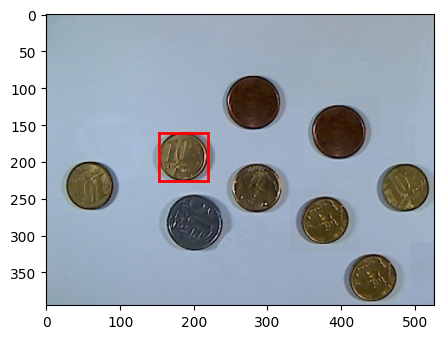

In [ ]:
# and plot a rectangle in the coordinates

# Coordinates for the square
_x = [min_x, max_x-min_x]
_y = [min_y, max_y-min_y]

plt.figure(figsize=(5, 5))

plt.imshow(coinsrgb, cmap='gray')  # Show the binary image in grayscale
plt.axis('on')  # Turn on the axis

# Draw a red square on the original image
rect = plt.Rectangle((_x[0], _y[0]), _x[1], _y[1], linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)  # Add the square to the current plot

plt.show()

## Particle Segmentation and Analysis with OpenCV


Particle | Perimeter | Circularity | Height | Width | 
     1   |   223.238 |       0.882 |     64 |    71 | 
     2   |   223.238 |       0.883 |     64 |    71 | 
     3   |   252.208 |       0.883 |     76 |    77 | 
     4   |   223.238 |       0.893 |     65 |    70 | 
     5   |   220.652 |        0.87 |     67 |    67 | 
     6   |    225.48 |       0.888 |     66 |    71 | 
     7   |    224.51 |       0.861 |     66 |    67 | 
     8   |   244.309 |       0.882 |     73 |    74 | 
     9   |   244.309 |       0.881 |     73 |    74 | 


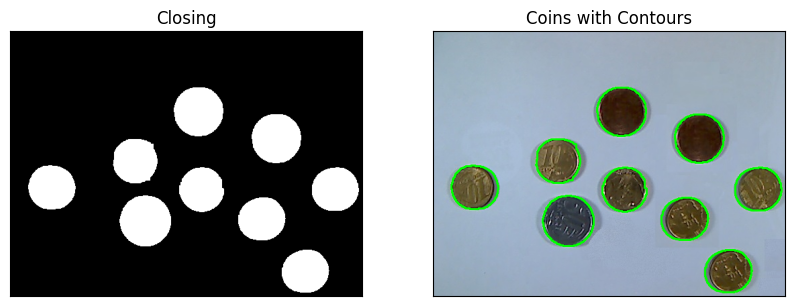

In [ ]:
# Load the image file
coins = cv.imread('coins_Br.jpg')
coinsrgb = cv.cvtColor(coins, cv.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv.cvtColor(coins, cv.COLOR_BGR2GRAY)

# Apply binary thresholding with Otsu's method to binarize the image
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)


# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Apply morphological closing to fill small holes in the binary image
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations = 2)

# Find contours in the closed image
contours, _ = cv.findContours(closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Initialize lists to store circularity, height, and width of particles
circularities = []
perimeters = []
heights = []
widths = []

# Iterate through each contour
for contour in contours:
    # Calculate the area and perimeter of the contour
    area = cv.contourArea(contour)
    perimeter = cv.arcLength(contour, True)
    perimeters.append(perimeter)

    # Calculate circularity
    circularity = 4 * np.pi * area / (perimeter * perimeter)
    circularities.append(circularity)

    # Find the bounding box of the contour
    x, y, w, h = cv.boundingRect(contour)

    # Calculate height and width
    heights.append(h)
    widths.append(w)

# Display results
print()
sep = ' | '
print(f"Particle{sep}Perimeter{sep}Circularity{sep}Height{sep}Width{sep}")
for i in range(len(contours)):
    print(f"     {i+1}  {sep}{round(perimeters[i], 3):9}{sep}{round(circularities[i], 3):11}{sep}{heights[i]:6}{sep}{widths[i]:5}{sep}")

# Display the contours on the original image
cv.drawContours(coinsrgb, contours, -1, (0, 255, 0), 2)

compare_images('Coins with Contours', coinsrgb, closing, 'Closing')
